<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 10:Linear regression in single and multiple variables


1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.



In [142]:
import pandas as pd
import numpy as np

In [202]:
# Taking pandas dataframe having both features and label. With last column being the label
def grad_desc(data, lr = 0.01, max_iter = 5000):
  x = data.iloc[:, :-1].values  # Extracting features
  y = data.iloc[:, -1].values # Extracting labels
  m = x.shape[0]  # no. of samples
  n = x.shape[1]  # no. of features
  # initialize weights wi
  w = np.random.randn(n+1)
  grads = np.zeros(len(w))
  # create x0 of 1s
  x0 = np.ones(m)
  x = np.insert(x,0,x0,axis = 1)
  cost_vals = []
  w_vals = []
  for _ in range(max_iter):
    y_hat = x@w
    cost_val = np.sum((y_hat - y)**2)/(2*m)
    cost_vals.append(cost_val)
    for i in range(len(grads)):
      grads[i] = np.dot((y_hat - y), x[:,i])/m
    w = w - lr*grads
    w_vals.append(w)
  return w, cost_vals, w_vals, y_hat

2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line.



In [144]:
data = pd.read_csv('/content/univariate_linear_regression.csv')

In [212]:
# Applying gradiend descent on the given input data
w, loss, w_list, _ = grad_desc(data, max_iter=1000)

In [213]:
# Creating data points
x_val = np.linspace(-10, 10, 100)
y_val = w[0] + w[1]*x_val

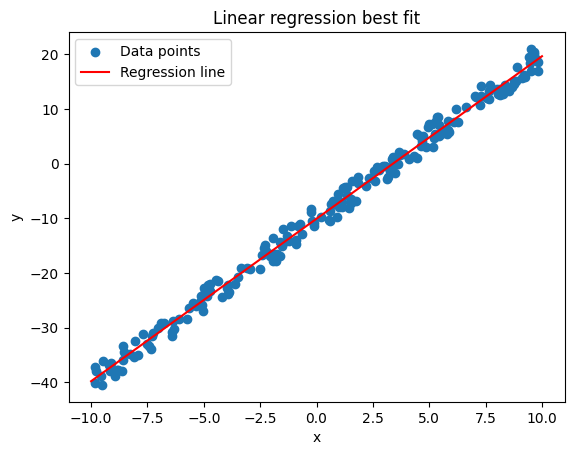

In [215]:
import matplotlib.pyplot as plt
plt.scatter(data['x'], data['y'], label = 'Data points')
plt.plot(x_val, y_val, label = 'Regression line', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression best fit')
plt.legend()
plt.show()

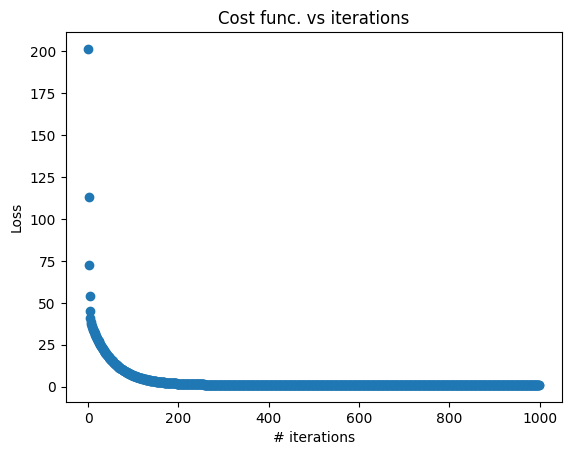

In [219]:
# Loss function v/s iterations
iters = range(1000)
plt.scatter(iters, loss, marker = 'o')
#plt.plot(x_val, y_val, label = 'Regression line', color = 'red')
plt.xlabel('# iterations')
plt.ylabel('Loss')
plt.title('Cost func. vs iterations')
plt.show()

In [246]:
x = [wt[0] for wt in w_list]
y = [wt[1] for wt in w_list]
z = loss

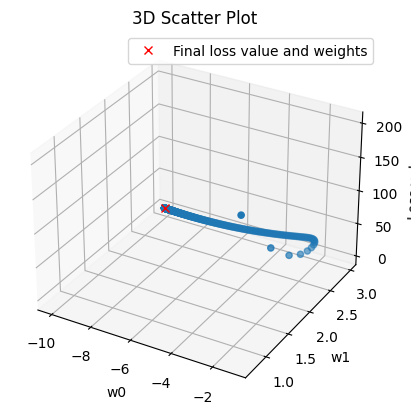

In [253]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.plot(x[-1], y[-1], z[-1], 'rx', label='Final loss value and weights', zorder=5)
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss value')
ax.set_title('3D Scatter Plot')
plt.legend()
# Show plot
plt.show()

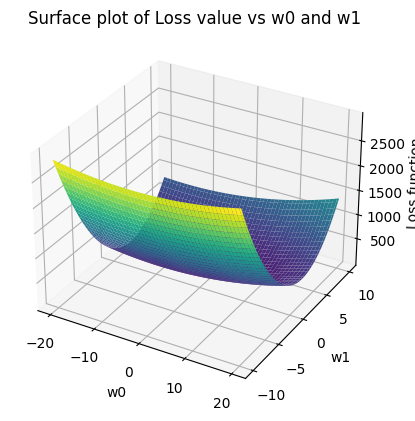

In [263]:
# Surface plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating sample data for plotting loss function
w0 = np.linspace(-20, 20, 100)
w1 = np.linspace(-10, 10, 100)
outputs = np.zeros((len(w0), len(w1)))

xval = data.iloc[:, :-1].values
x0 = np.ones(xval.shape[0])
xval = np.insert(xval,0,x0,axis = 1)
yval = data.iloc[:, -1].values

# Function to calculate loss value
def calculate_loss(w0,w1):
  w = np.array([w0,w1])
  y_hat = xval@w
  cost_val = np.sum((y_hat - yval)**2)/(2*xval.shape[0])
  return cost_val

for i, val_w0 in enumerate(w0):
    for j, val_w1 in enumerate(w1):
        # Call your function with the current combination of w0 and w1 values
        output = calculate_loss(val_w0, val_w1)
        # Store the output in the 2D array
        outputs[i, j] = output

W0, W1 = np.meshgrid(w0, w1)
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, outputs.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss function')
ax.set_title('Surface plot of Loss value vs w0 and w1')
plt.show()

3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?



In [176]:
df = pd.read_csv('/content/heart.data.csv')
df = df.iloc[:,1:]

In [182]:
df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [177]:
df1 = df.copy()

In [197]:
# Normalize data
df1.iloc[:,0] = (df1.iloc[:,0] - min(df1.iloc[:,0]))/(max(df1.iloc[:,0])-min(df1.iloc[:,0]))
df1.iloc[:,1] = (df1.iloc[:,1] - min(df1.iloc[:,1]))/(max(df1.iloc[:,1])-min(df1.iloc[:,1]))

In [206]:
# Fitting data and finding best fit plane using grad_desc
w2, loss2, w_list2, y_hat = grad_desc(df1)

In [207]:
# Creating data points
x1_val = np.linspace(0, 80, 100)
x2_val = np.linspace(0, 30, 100)
x1,x2 = np.meshgrid(x1_val, x2_val)
# Normalization
x1_norm = (x1 - x1.min()) / (x1.max() - x1.min())
x2_norm = (x2 - x2.min()) / (x2.max() - x2.min())
# Predicting y values for given data points
y_pred = w2[0] + w2[1]*x1_norm + w2[2]*x2_norm

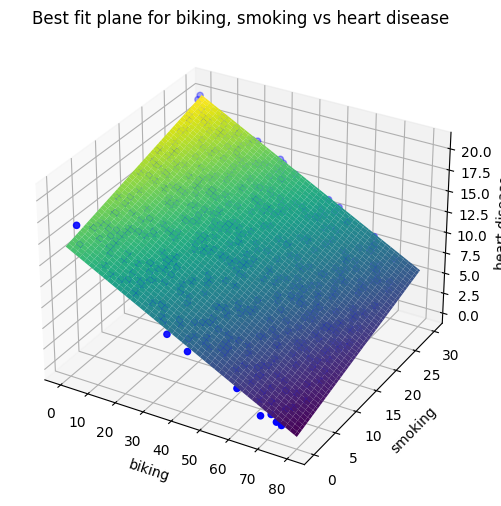

In [208]:
# Plotting
fig1 = plt.figure(figsize=(15,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x1, x2, y_pred, cmap='viridis')
ax1.scatter(df['biking'], df['smoking'], df['heart.disease'], c='b', marker='o')
# Set labels and title
ax1.set_xlabel('biking')
ax1.set_ylabel('smoking')
ax1.set_zlabel('heart disease')
ax1.set_title('Best fit plane for biking, smoking vs heart disease')

plt.show()

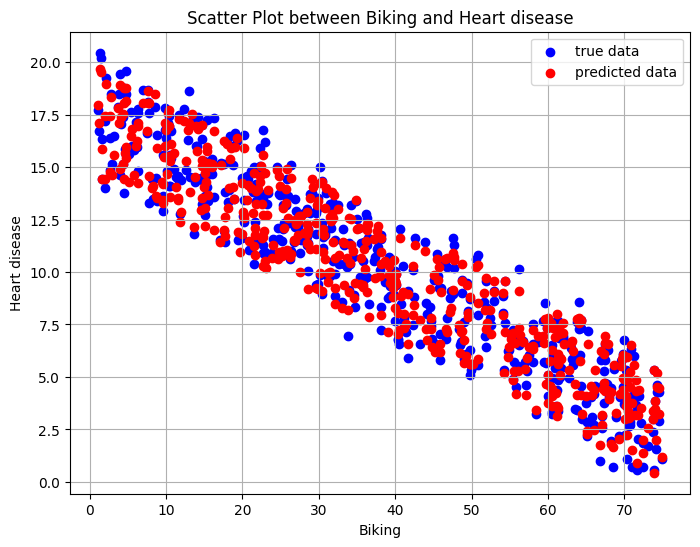

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(df['biking'], df['heart.disease'], color='blue', label='true data')
plt.scatter(df['biking'], y_hat, color='red', label='predicted data')
plt.xlabel('Biking')
plt.ylabel('Heart disease')
plt.title('Scatter Plot between Biking and Heart disease')
plt.grid()
plt.legend()
plt.show()

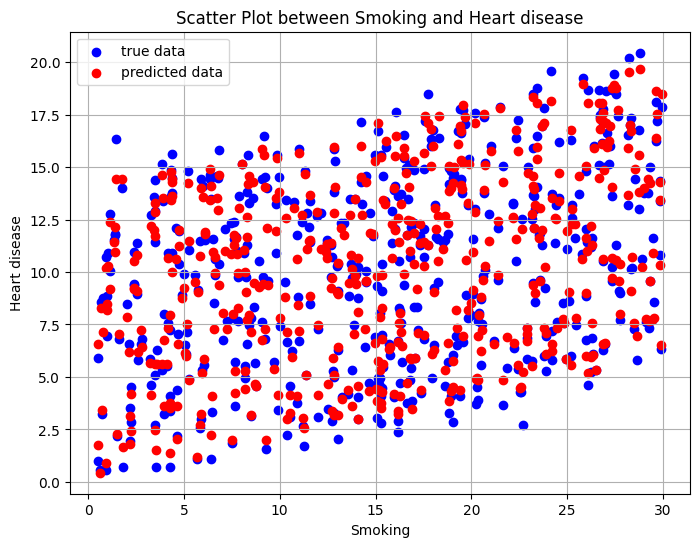

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(df['smoking'], df['heart.disease'], color='blue', label='true data')
plt.scatter(df['smoking'], y_hat, color='red', label='predicted data')
plt.xlabel('Smoking')
plt.ylabel('Heart disease')
plt.title('Scatter Plot between Smoking and Heart disease')
plt.grid()
plt.legend()
plt.show()